In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rollercoaster-database/coaster_db.csv
/kaggle/input/rollercoaster-database/flipflap.jpg


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set_option('max_columns',200)

In [3]:
df = pd.read_csv('/kaggle/input/rollercoaster-database/coaster_db.csv')

In [4]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [5]:
df = df[['coaster_name',
    #'Length', 'Speed', 
    'Location', 'Status', 
    #'Opening date',
       #'Type', 
    'Manufacturer',
    #'Height restriction', 'Model', 'Height',
      # 'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
      # 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
      # 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
      # 'Track layout', 'Fastrack available', 'Soft opening date.1',
      # 'Closing date', 'Opened', 'Replaced by', 'Website',
      # 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       #'Single rider line available', 'Restraint Style',
       #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    #'height_value', 'height_unit', 
    'height_ft','Inversions_clean', 'Gforce_clean']].copy()

In [6]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [7]:
df = df.rename(columns={'coaster_name':'Coaster_Name', 'year_introduced':'Year_Introduced','opening_date_clean':'Opening_Date', 'speed_mph':'Speed_mph',
       'height_ft':'Height_Fft', 'Inversions_clean':'Inversions', 'Gforce_clean':'Gforce' })

In [8]:
df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
latitude           275
longitude          275
Type_Main            0
Opening_Date       250
Speed_mph          150
Height_Fft         916
Inversions           0
Gforce             725
dtype: int64

In [9]:
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_Fft,Inversions,Gforce


In [10]:
df.loc[df.duplicated(subset=['Coaster_Name'])].head(5)

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_Fft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [11]:
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_Fft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [12]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'latitude', 'longitude', 'Type_Main', 'Opening_Date', 'Speed_mph',
       'Height_Fft', 'Inversions', 'Gforce'],
      dtype='object')

In [13]:
df = df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])] \
.reset_index(drop=True).copy()


Text(0, 0.5, 'Count')

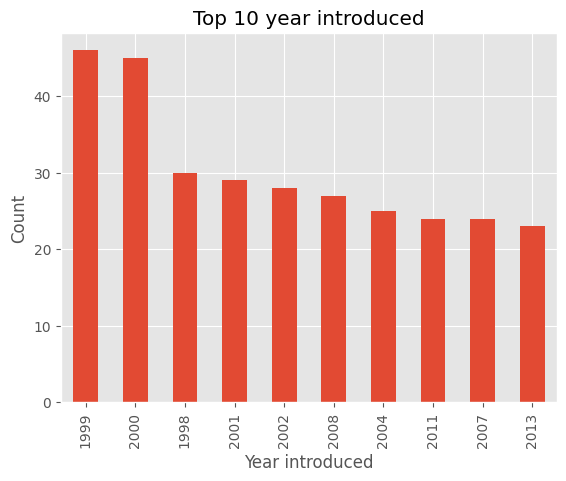

In [14]:
ax = df['Year_Introduced'].value_counts()\
  .head(10)\
  .plot(kind = 'bar', title = 'Top 10 year introduced')
ax.set_xlabel('Year introduced')
ax.set_ylabel('Count')


Text(0.5, 0, 'Speed (mph)')

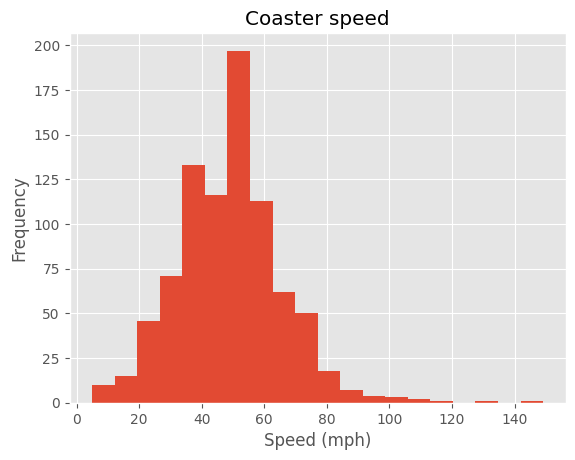

In [15]:
ax = df['Speed_mph'].plot(kind = 'hist', bins = 20, title = 'Coaster speed')
ax.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Speed (mph)')

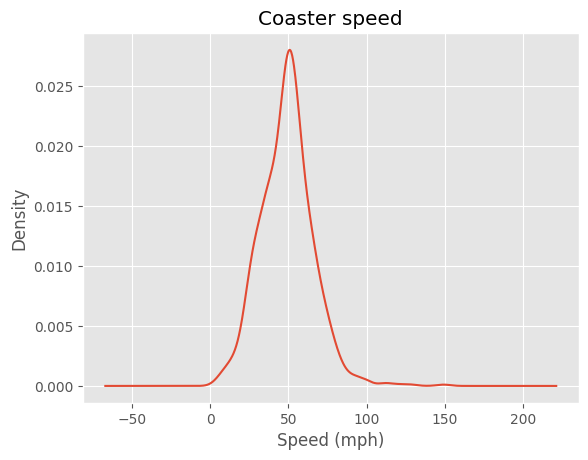

In [16]:
ax = df['Speed_mph'].plot(kind = 'kde', title = 'Coaster speed')
ax.set_xlabel('Speed (mph)')

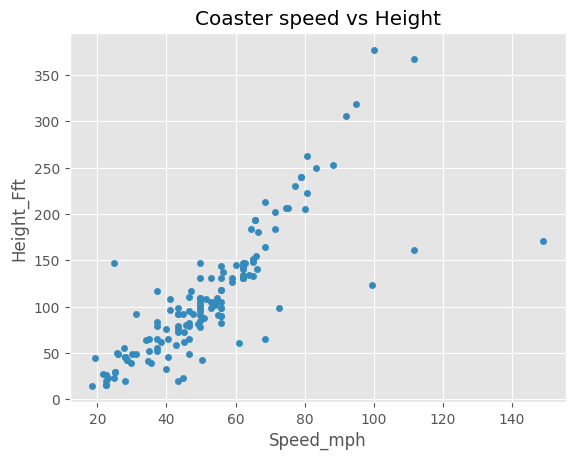

In [17]:
df.plot(kind='scatter',
       x='Speed_mph',
       y='Height_Fft',
       title='Coaster speed vs Height')
plt.show()

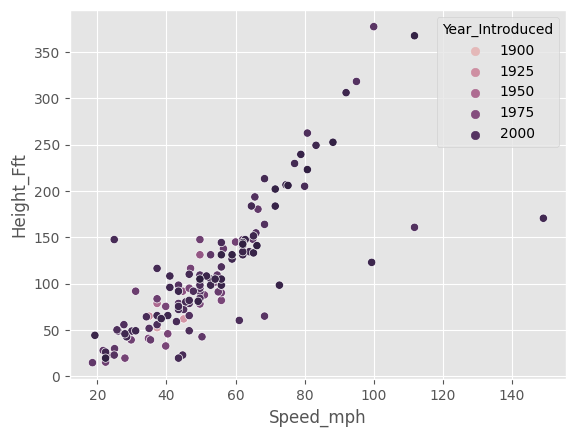

In [18]:
sns.scatterplot(x='Speed_mph',
                y='Height_Fft',
                hue='Year_Introduced',
                data=df)
plt.show()

In [19]:
df.head()


,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_Fft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


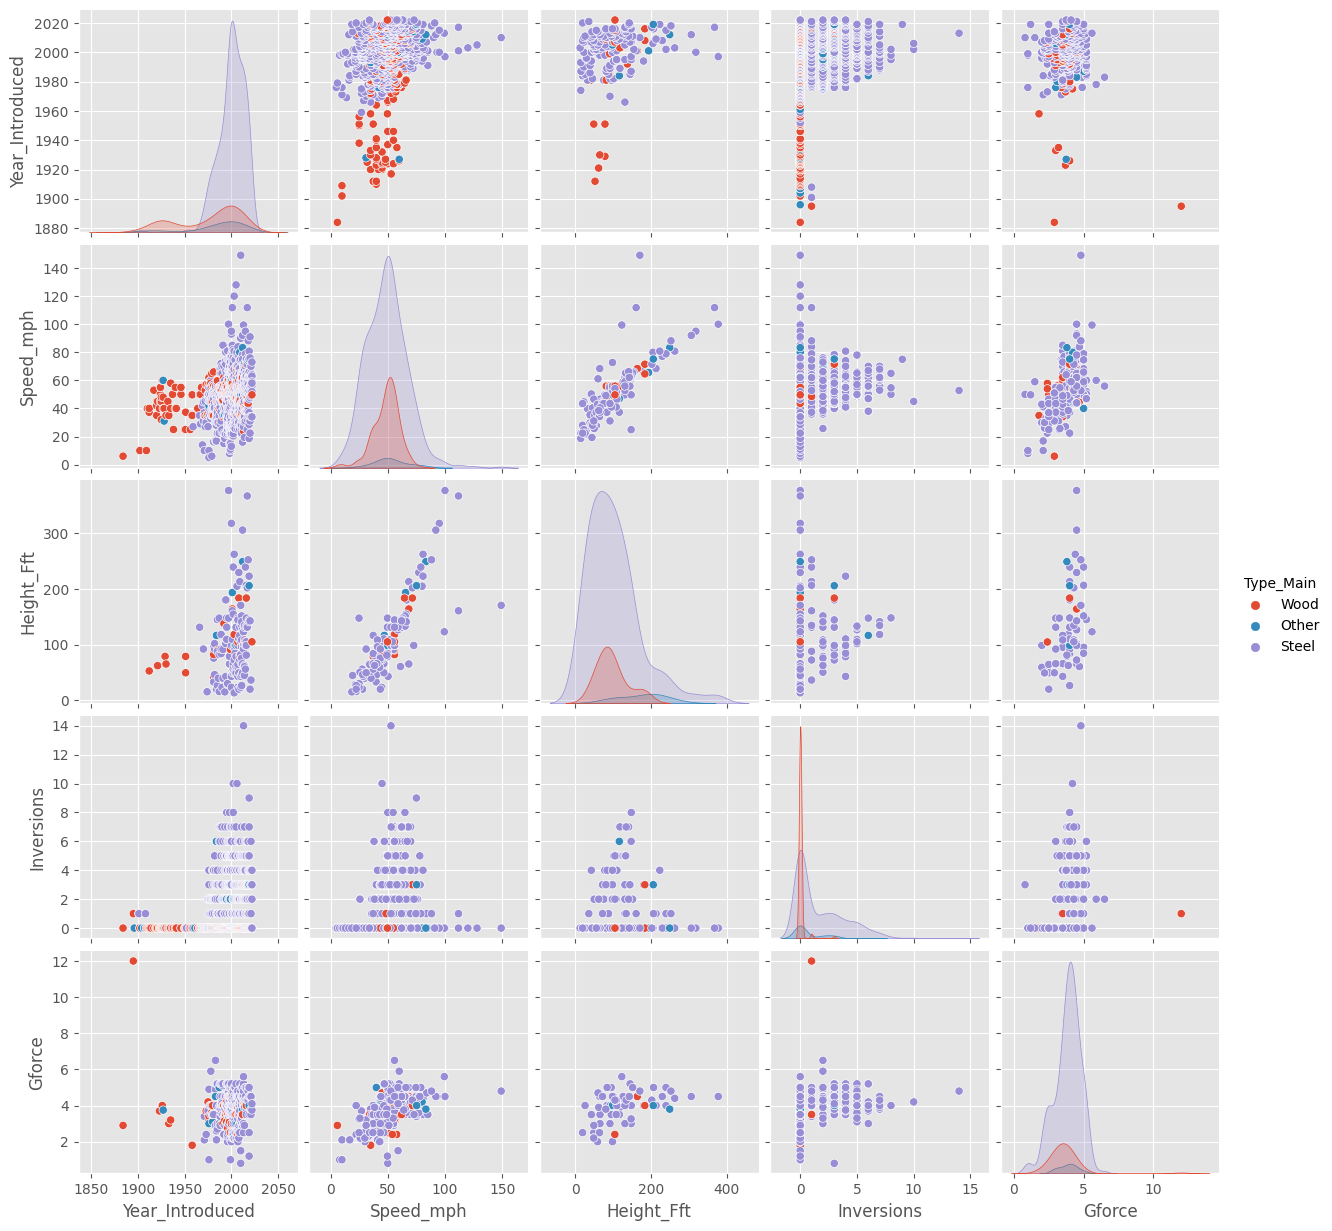

In [20]:
sns.pairplot(df,vars=['Year_Introduced','Speed_mph','Height_Fft','Inversions','Gforce'],
            hue='Type_Main')
plt.show()

In [21]:
df_corr = df[['Year_Introduced','Speed_mph','Height_Fft',
                 'Inversions','Gforce']].dropna().corr()
df_corr



,Year_Introduced,Speed_mph,Height_Fft,Inversions,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_Fft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


<Axes: >

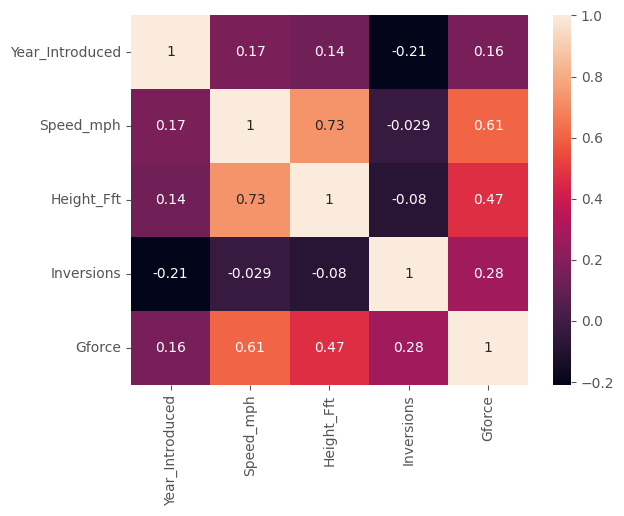

In [22]:
sns.heatmap(df_corr,annot=True)

What are the locations with fastest rollercoster

Text(0.5, 0, 'Average Coaster Speed')

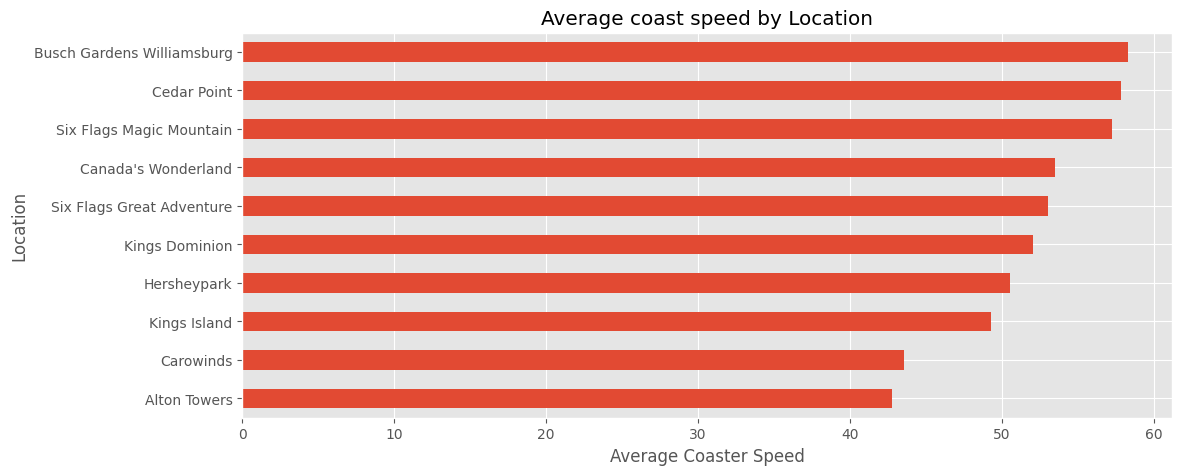

In [23]:
ax = df.query('Location!="Other"')\
         .groupby('Location')['Speed_mph']\
         .agg(['mean','count'])\
         .query('count>=10')\
         .sort_values('mean')['mean']\
         .plot(kind='barh',figsize=(12,5),title='Average coast speed by Location')
ax.set_xlabel('Average Coaster Speed')